# **Import the libraries**

In [64]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



import matplotlib.pyplot as plt
import seaborn as sns




# **Import the Dataset**

In [65]:
df = pd.read_csv("Housing.csv")

# **Analyse the Dataset structure**

In [66]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Analyse Column Null Values

In [67]:
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


# **Analyze Class Column Count**

In [68]:
df["basement"].value_counts()

,count
basement,
no,354
yes,191


<Figure size 1400x600 with 0 Axes>

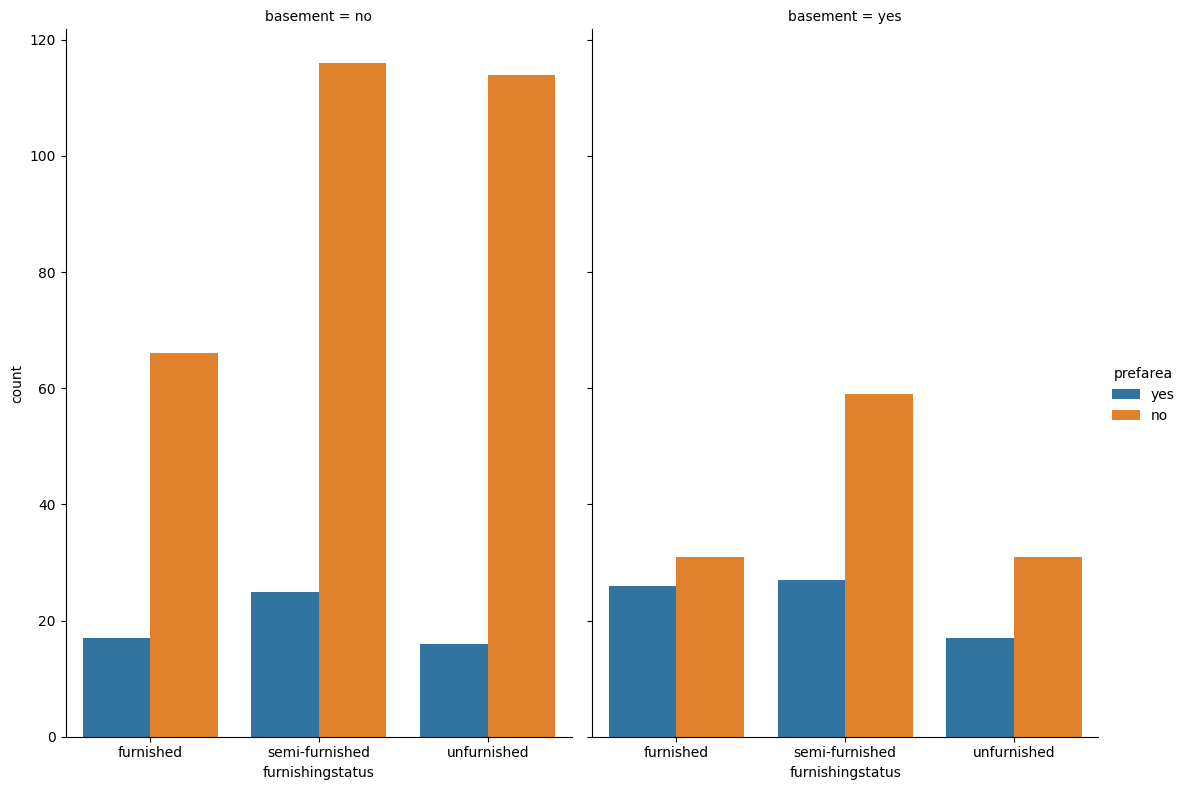

In [69]:
plt.figure(figsize=(14,6))
g = sns.catplot(x = "furnishingstatus", col = "basement", hue="prefarea",data=df,kind="count",height=8,aspect=.7)

# **Data Preprocessing (Convert entire dataframe into numbers)**

In [70]:
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,218,232,3,1,2,1,0,0,0,1,2,1,0
1,217,260,3,3,3,1,0,0,0,1,3,0,0
2,217,268,2,1,1,1,0,1,0,0,2,1,1
3,216,237,3,1,1,1,0,1,0,1,3,1,0
4,215,232,3,0,1,1,1,1,0,1,2,0,0


# **Split the X(Feature columns) and Y(Target column) Variables.**

In [71]:
x = df.drop(["basement"],axis=1)
y = df["basement"]

# **Spit the Dataset into Test and Training**

In [72]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size= 0.7, random_state=1)

In [73]:
xTest

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
62,175,190,3,1,1,1,0,0,1,1,0,0
247,97,253,3,0,3,1,0,0,0,3,0,2
142,135,272,3,1,1,1,0,0,0,1,0,1
107,150,198,2,0,2,1,0,0,0,0,1,2
483,28,207,2,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
450,40,61,2,0,1,1,0,0,0,0,0,1
542,0,72,1,0,0,1,0,0,0,0,0,2
408,51,100,1,0,0,1,0,0,0,0,0,2
80,164,183,2,0,1,1,0,1,0,1,1,1


In [74]:
xTrain

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
180,121,126,3,1,0,0,0,0,1,2,0,1
189,117,68,1,0,0,0,1,0,0,0,0,1
93,156,226,2,1,0,1,0,0,1,3,0,1
444,41,46,2,0,1,0,0,0,0,0,0,0
81,163,100,2,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
129,142,277,2,0,2,1,0,0,0,2,1,1
144,135,134,3,0,1,1,1,0,1,1,0,0
72,167,153,2,0,3,1,0,0,1,0,1,2
235,100,169,2,0,1,1,1,0,1,1,0,1


In [75]:
yTest

,basement
62,0
247,0
142,0
107,1
483,0
...,...
450,1
542,0
408,0
80,0


In [76]:
yTrain

,basement
180,1
189,1
93,1
444,0
81,1
...,...
129,0
144,1
72,0
235,0


# **Decision Tree Model**

In [77]:
dt = DecisionTreeClassifier(random_state=2, max_depth=5)
dt.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=5, random_state=2)

# **Predict**

In [78]:
predictions = dt.predict(xTest)

In [79]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [80]:
yTest

,basement
62,0
247,0
142,0
107,1
483,0
...,...
450,1
542,0
408,0
80,0


# **Measure the model Accuracy Score**

In [81]:
accuracy_score(yTest, predictions)

0.7317073170731707

# **Confusion Matrix**

cm = confusion(yTest,prediction)

In [82]:
cm = confusion_matrix(yTest,predictions)
print('Confusion Matrix\n\n',cm)

Confusion Matrix

 [[84 25]
 [19 36]]


f, ax = plt.subplot(10, 10)

sns.heatmap(cm, annot = True, linewidth=0.5, lineccolor='red', fmt='.0f',ax,=ax )
plt.show

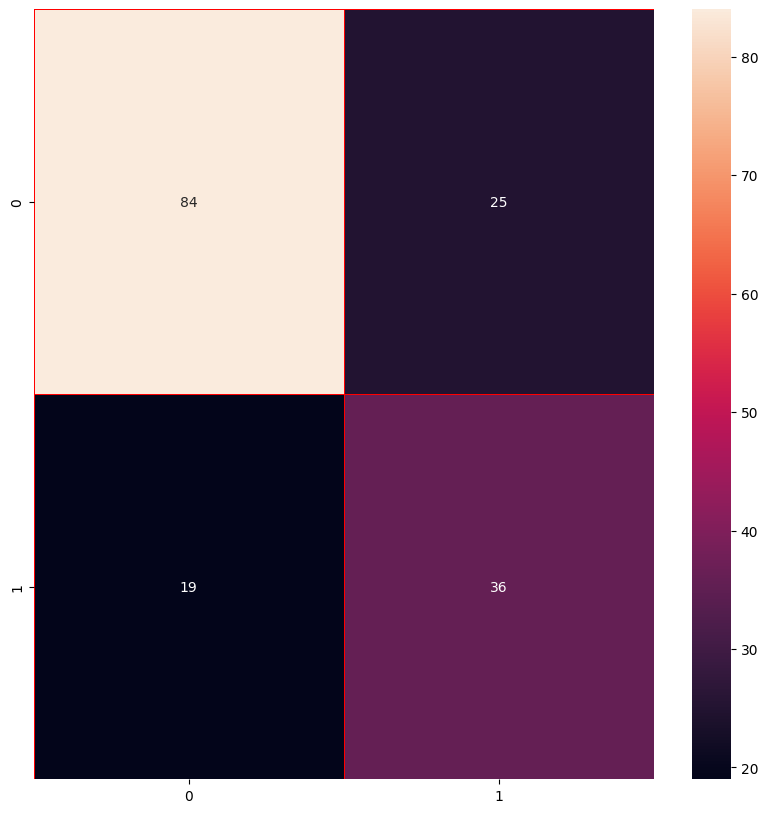

In [83]:
f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(cm, annot = True, linewidth=0.5, linecolor='red', fmt='.0f',ax=ax)

plt.show()

In [84]:
print(classification_report(yTest,predictions))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       109
           1       0.59      0.65      0.62        55

    accuracy                           0.73       164
   macro avg       0.70      0.71      0.71       164
weighted avg       0.74      0.73      0.73       164



# **Random Forest Model**

In [85]:
rf = RandomForestClassifier(random_state=2, max_depth=5)
rf.fit(xTrain, yTrain)
rf.score(xTrain, yTrain)

0.8451443569553806

# **Random Forest Predictions**

In [86]:
rfPredictions = rf.predict(xTest)
rf.score(xTest, yTest)
accuracy_score(yTest, rfPredictions)

0.7865853658536586

In [87]:
rfcm = confusion_matrix(yTest, rfPredictions)
print('Confusion Matrix\n\n',rfcm)

Confusion Matrix

 [[104   5]
 [ 30  25]]


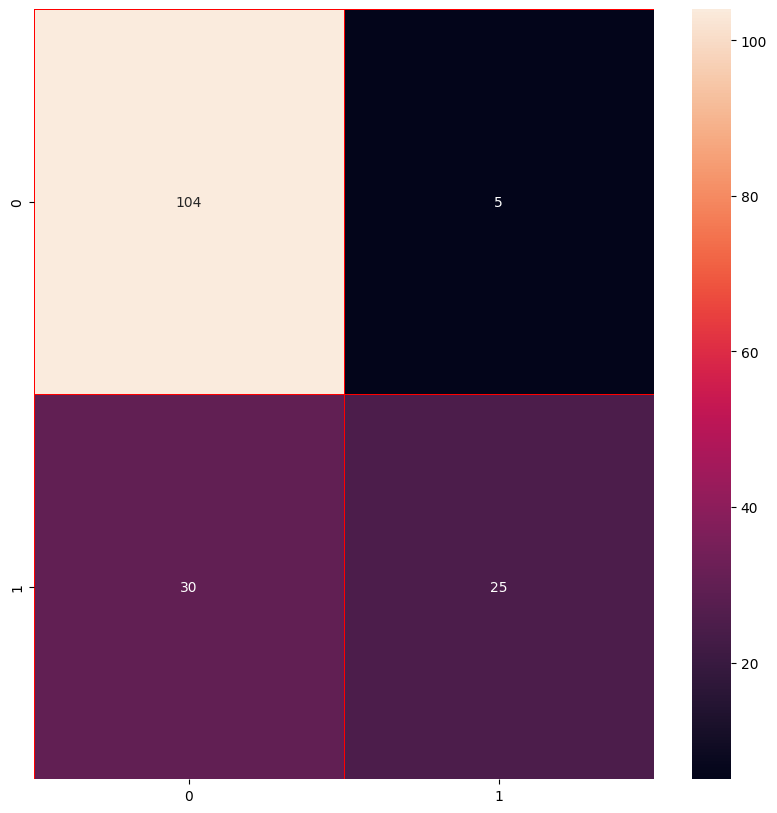

In [88]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(rfcm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [89]:
print(classification_report(yTest, rfPredictions))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       109
           1       0.83      0.45      0.59        55

    accuracy                           0.79       164
   macro avg       0.80      0.70      0.72       164
weighted avg       0.80      0.79      0.77       164

